In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [19]:
# Load data
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [21]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [22]:
# Convert 'Ship Date' to datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [26]:
# Aggregate sales by Order Date to create a daily time series of total sales
daily_sales = df.groupby('Order Date')['Sales'].sum()

In [27]:
daily_sales

Order Date
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Sales, Length: 1230, dtype: float64

# Visualize the Data

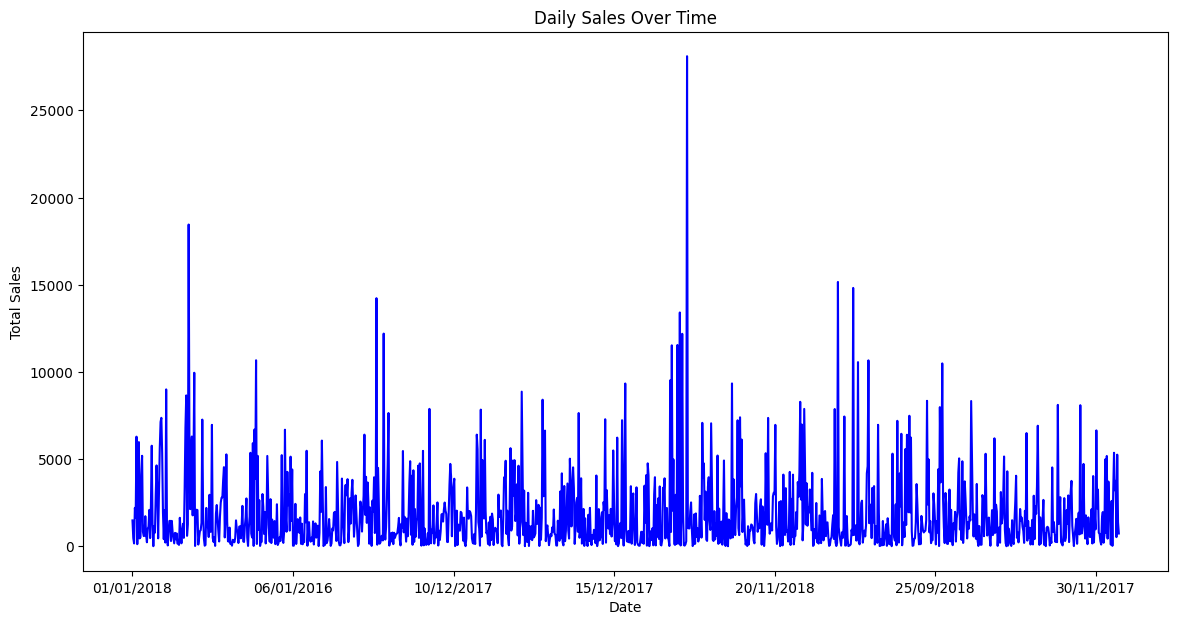

In [21]:
# Plot the daily sales
plt.figure(figsize=(14, 7))
daily_sales.plot(title='Daily Sales Over Time', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


# Check for Stationarity

In [22]:
# Perform the ADF test
result = adfuller(daily_sales)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -8.654440237320303
p-value: 5.013097828232708e-14


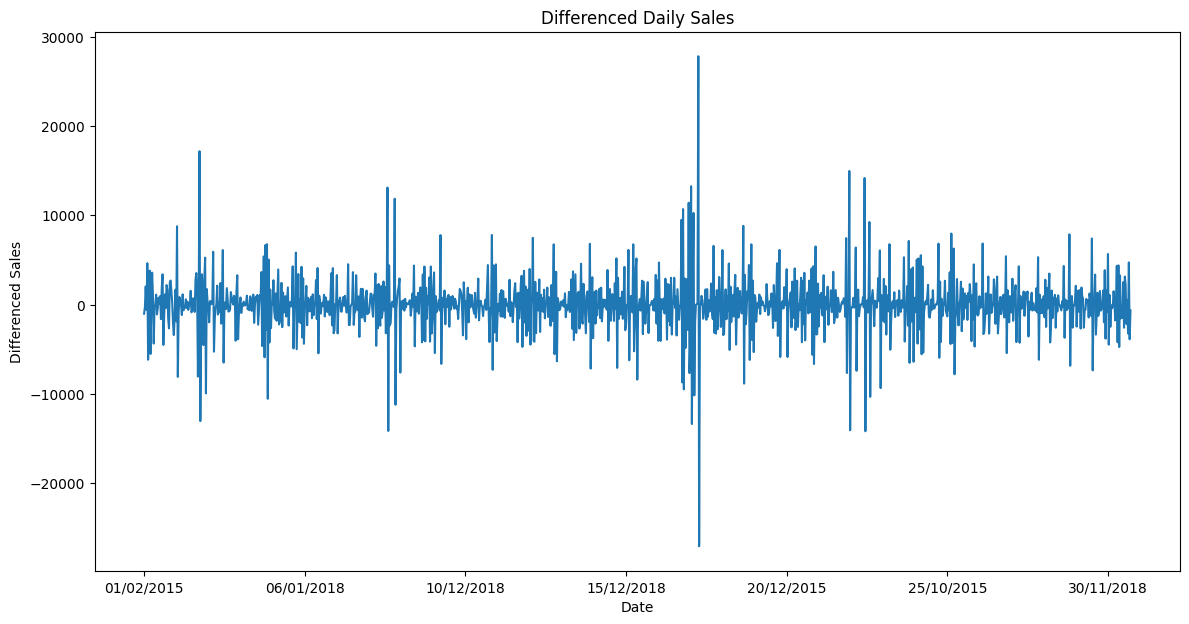

In [23]:
# First differencing
daily_sales_diff = daily_sales.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(14, 7))
daily_sales_diff.plot(title='Differenced Daily Sales')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.show()


# Model Selection and Training

In [24]:
# Fit the ARIMA model
model = ARIMA(daily_sales, order=(1, 1, 1))
arima_result = model.fit()

# Summary of the model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1230
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11257.521
Date:                Fri, 01 Nov 2024   AIC                          22521.042
Time:                        12:12:50   BIC                          22536.384
Sample:                             0   HQIC                         22526.814
                               - 1230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0315      0.034      0.917      0.359      -0.036       0.099
ma.L1         -1.0000      0.013    -78.468      0.000      -1.025      -0.975
sigma2      5.274e+06   2.42e-09   2.18e+15      0.0

# Forecasting

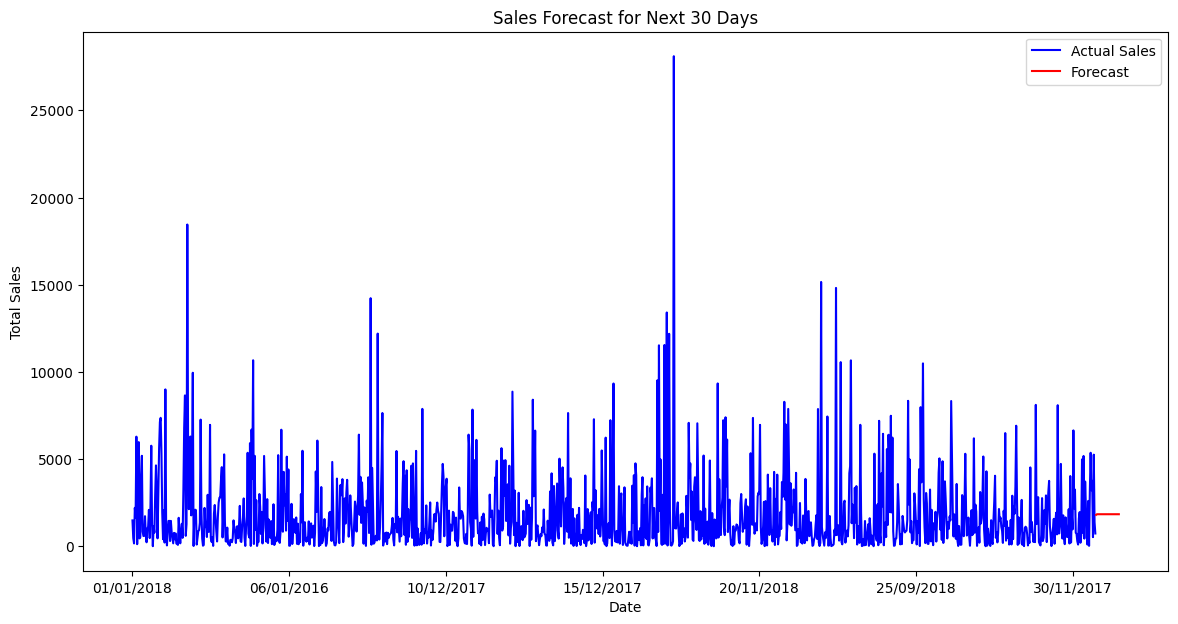

In [25]:
# Forecast the next 30 days
forecast = arima_result.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(14, 7))
daily_sales.plot(label='Actual Sales', color='blue')
forecast.plot(label='Forecast', color='red')
plt.title('Sales Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


# More Modeling

# SARIMA

In [26]:
 
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model
sarima_model = SARIMAX(daily_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Model summary
print(sarima_result.summary())



                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 1230
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -11171.844
Date:                            Fri, 01 Nov 2024   AIC                          22353.688
Time:                                    12:15:20   BIC                          22379.208
Sample:                                         0   HQIC                         22363.294
                                           - 1230                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0379      0.037      1.032      0.302      -0.034       0.110
ma.L1         -1.0000      0.292   

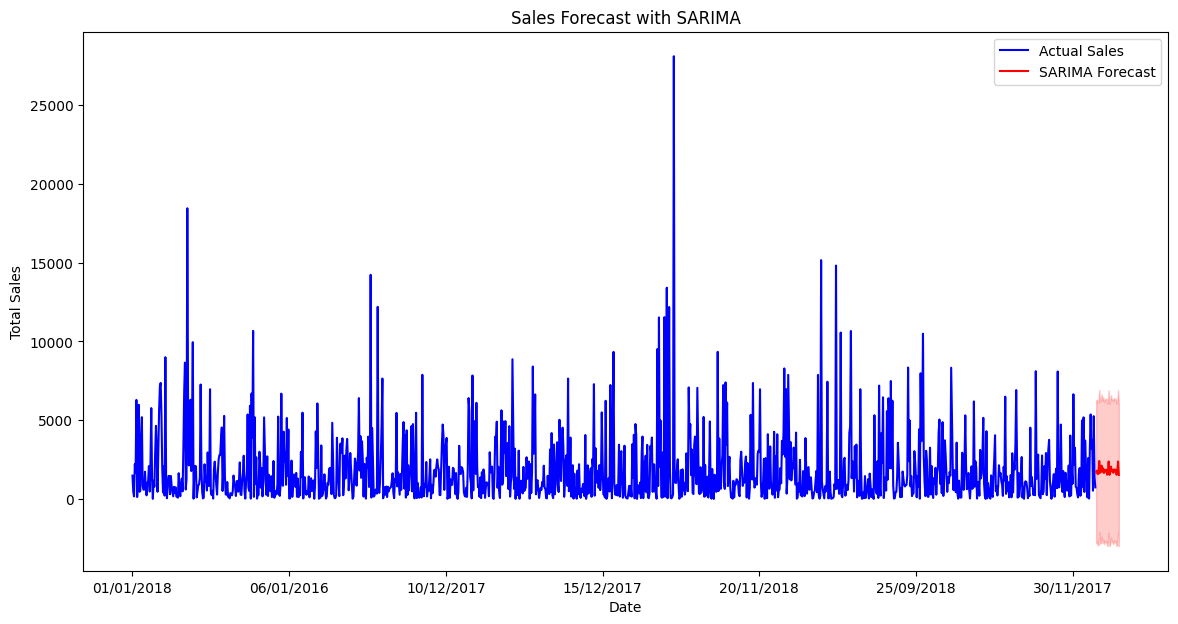

In [27]:
# Forecasting the next 30 days
sarima_forecast = sarima_result.get_forecast(steps=30)
forecast_ci = sarima_forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(14, 7))
daily_sales.plot(label='Actual Sales', color='blue')
sarima_forecast.predicted_mean.plot(label='SARIMA Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title('Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


# LSTM (Long Short-Term Memory) Neural Networks

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [28]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(daily_sales.values.reshape(-1, 1))

In [29]:
# Convert data to sequences for LSTM (use past 30 days to predict the next day)
X, y = [], []
sequence_length = 30
for i in range(sequence_length, len(sales_scaled)):
    X.append(sales_scaled[i-sequence_length:i, 0])
    y.append(sales_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM

In [32]:
X[0]

array([[5.13188350e-04],
       [1.01774825e-02],
       [6.23063246e-04],
       [1.56738069e-01],
       [3.02913845e-03],
       [1.37055412e-03],
       [1.87886784e-03],
       [2.81625583e-04],
       [1.26376412e-01],
       [2.13256214e-03],
       [5.26335621e-03],
       [1.06010417e-02],
       [2.23589009e-03],
       [1.33987952e-02],
       [9.50675814e-02],
       [1.35404442e-03],
       [3.89694731e-02],
       [1.51093994e-02],
       [6.77111163e-05],
       [8.48523828e-03],
       [1.02702072e-02],
       [1.66119955e-02],
       [7.45857693e-03],
       [3.38331419e-03],
       [4.70949850e-03],
       [1.16879776e-02],
       [6.34395874e-03],
       [4.46010952e-04],
       [7.26346716e-02],
       [4.53813920e-03]])

In [31]:
y

array([0.02044858, 0.00068796, 0.0002496 , ..., 0.05889856, 0.10366629,
       0.02532549])

In [33]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# Training the model
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0077
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0056
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0065
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0078
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0059
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0080
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0062
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0063
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0078


In [35]:
# Forecasting the next 30 days
last_sequence = sales_scaled[-sequence_length:]
predictions = []
for _ in range(30):
    pred = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predictions.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred[0, 0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

In [36]:
# Inverse transform predictions to original scale
forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

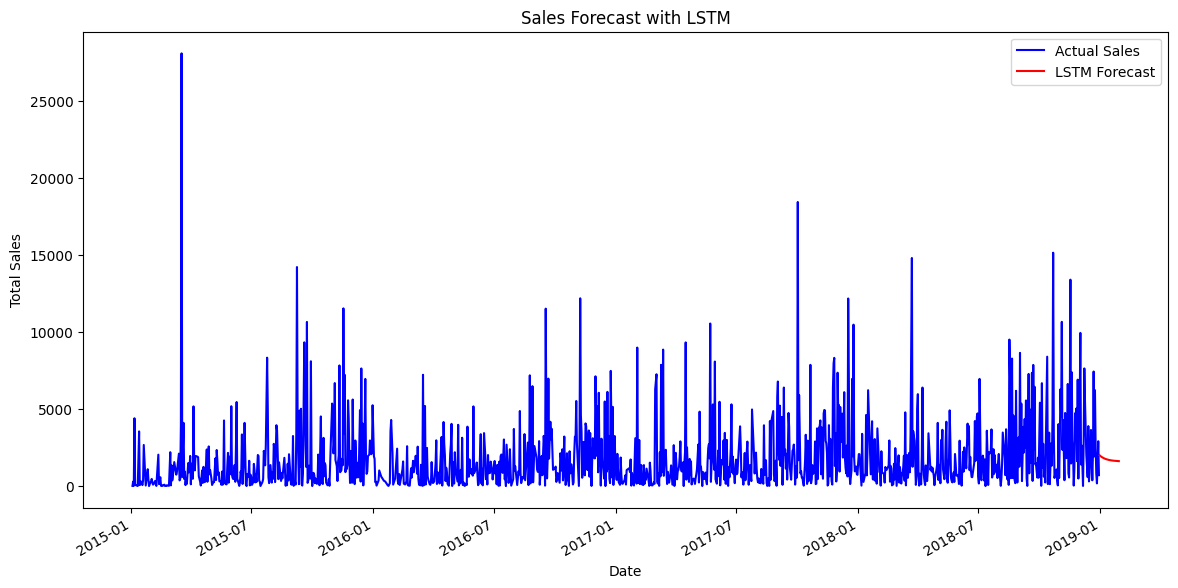

In [37]:
# Plot the forecast
plt.figure(figsize=(14, 7))
daily_sales.plot(label='Actual Sales', color='blue')
plt.plot(pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=30), forecast, label='LSTM Forecast', color='red')
plt.title('Sales Forecast with LSTM')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()